# Support Vector Machines

Another powerful and widely used learning algorithm is the Support Vector Machine (SVM), which can be considered an extension of the perceptron. In SVMs the optimization objective is to maximize the margin instead of minimizing the misclassification errors. However, in SVMs our optimization objective is to maximize the margin. The margin is defined as the distance between the separating hyperplane (decision boundary) and the training samples that are closest to this hyperplane, which are the so-called **support vectors**. 

<img src="images/support_vectors.jpg" alt="Support Vectors" title="Support Vectors" height="350" width="500">

## Maximum Margin Intuition

To get an idea of the margin maximization, let's take a closer look at those positive and negative hyperplanes that are parallel to the decision boundary, which can be expressed as follows:

\begin{equation*}
\begin{matrix}
w_0 + w^Tx_{pos} = 1 & (1) \\
w_0 + w^Tx_{neg} = -1 & (2)
\end{matrix}
\end{equation*}

If we subtract those two linear equations (1) and (2) from each other, we get:

\begin{equation*}
\Rightarrow w^T \left( x_{pos} - x_{neg} \right) = 2
\end{equation*}

We can normalize this equation by the length of the vector $w$, which is defined as follows:

\begin{equation*}
\| w \| = \sqrt{\sum_{j=1}^m w_j^2}
\end{equation*}

So we arrive at the following equation:

\begin{equation*}
\frac{w^T \left( x_{pos} - x_{neg} \right) }{\| w \|} = \frac{2}{\| w \|}
\end{equation*}

The left side of the preceding equation can then be interpreted as the distance between the positive and negative hyperplane, which is the so-called margin that we want to maximize.

Now, the objective function of the SVM becomes the maximization of this margin by maximizing $\frac{2}{\| w \|}$ under the constraint that the samples are classified correctly, which can be written as:

\begin{equation*}
\begin{matrix}
w_0 + w^T x^{(i)} \geq 1 & \text{ if } y^{(i)}= 1 \\
w_0 + w^T x^{(i)} \leq -1 & \text{ if } y^{(i)} = -1 \\
\text{for } i = 1 \dots N & \\
\end{matrix}
\end{equation*}

Here, N is the number of samples in our dataset.

These two equations basically say that all negative samples should fall on one side of the negative hyperplane, whereas all the positive samples should fall behind the positive hyperplane, which can also be written more compactly as follows:

\begin{equation*}
y^{(i)} \left( w_0 + w^T x^{(i)} \right) \geq 1 \forall_i
\end{equation*}

In practice though, it is easier to minimize the reciprocal term $\frac{1}{2} \| w \|^2$ , which can be solved by quadratic programming.

## Dealing with a nonlinearly separable case using slack variables

The motivation for introducing the slack variable $\xi$ was that the linear constraints need to be relaxed for nonlinearly separable data to allow the convergence of the optimization in the presence of misclassifications, under appropriate cost penalization.

The positive-values slack variable is simply added to the linear constraints:

\begin{equation*}
\begin{matrix}
w_0 + w^T x^{(i)} \geq 1 - \xi^{(i)} & \text{if } y^{(i)} = 1 \\
w_0 + w^T x^{(i)} \leq -1 + \xi^{(i)} & \text{if } y^{(i)} = -1 \\
\text{for } i = 1 \dots N
\end{matrix}
\end{equation*}

Here, $N$ is the number of samples in our dataset. So the new objective to be minimized (subject to the constraints) becomes:

\begin{equation*}
\frac{1}{2} \| w \|^2 + C \left( \sum_i \xi^{(i)} \right)
\end{equation*}

Via the variable $C$, we can then control the penalty for misclassification. Large values of $C$ correspond to large error penalties, whereas we are less strict about misclassification errors if we choose smaller values for $C$. We can then use the $C$ parameter to control the width of the margin and therefore tune the bias-variance trade-off, as illustrated in the following figure:

<img src="images/c_values.jpg" alt="Large and Small values for C param" title="Large and Small values for C param" height="200" width="350">

This concept is related to regularization: where decreasing the value of C increases the bias and lowers the variance of the model.

Now that we have learned the basic concepts behind a linear SVM, let us train an SVM model to classify the different flowers in our Iris dataset:

In [1]:
#prepare data
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
from sklearn.model_selection import train_test_split

iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

X_train_01_subset = X_train[(y_train == 0) | (y_train == 1)]
y_train_01_subset = y_train[(y_train == 0) | (y_train == 1)]

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

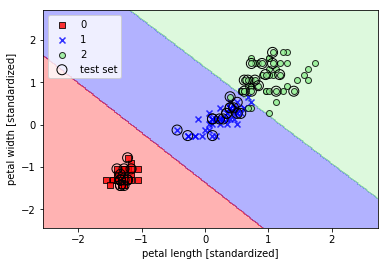

In [3]:
%matplotlib inline
from plot_regions import plot_decision_regions
from sklearn.svm import SVC

import matplotlib.pyplot as plt


svm = SVC(kernel='linear', C=1.0, random_state=1)
svm.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined, classifier=svm, test_idx=range(105, 150))

plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()

Sometimes our datasets are too large to fit into computer memory. Thus, scikit-learn also offers alternative implementations via the SGDClassifier class, which also supports online learning via the partial_fit method.

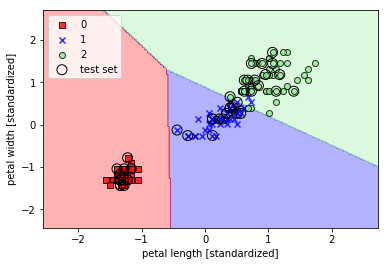

In [5]:
from sklearn.linear_model import SGDClassifier

svm = SGDClassifier(loss='hinge', max_iter=10000, tol=1e-3)
svm.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined, classifier=svm, test_idx=range(105, 150))

plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()

## Nonlinear problems using a kernel SVM


Another reason why SVMs enjoy high popularity among machine learning practitioners is that it can be easily kernelized to solve nonlinear classification problems. First create a sample dataset to see what such a nonlinear classification problem may look like.

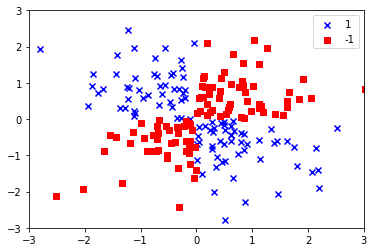

In [6]:
np.random.seed(1)
X_xor = np.random.randn(200, 2)
y_xor = np.logical_xor(X_xor[:, 0] > 0,
                       X_xor[:, 1] > 0)
y_xor = np.where(y_xor, 1, -1)
plt.scatter(X_xor[y_xor == 1, 0],
            X_xor[y_xor == 1, 1],
            c='b',
            marker='x',
            label='1')
plt.scatter(X_xor[y_xor == -1, 0],
            X_xor[y_xor == -1, 1],
            c='r',
            marker='s',
            label='-1')
plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.legend(loc='best')
plt.show()


The basic idea behind kernel methods to deal with such linearly inseparable data is to create nonlinear combinations of the original features to project them onto a higher-dimensional space via a mapping function $\phi$ where it becomes linearly separable. we can transform a two-dimensional dataset onto a new three-dimensional feature space where the classes become separable via the following projection:

\begin{equation*}
\phi \left(x_1, x_2 \right) = \left( z_1, z_2, z_3 \right) = \left( x_1, x_2, x_1^2 + x_2^2 \right)
\end{equation*}

<img src="images/svm_linear_projection.jpeg" alt="SVM linear projection" title="SVM linear projection" height="400" width="550">


### Using the kernel trick to find separating hyperplanes in high-dimensional space

To solve a nonlinear problem using an SVM, we would transform the training data onto a higher-dimensional feature space via a mapping function $\phi$ and train a linear SVM model to classify the data in this new feature space. Then, we can use the same mapping function $\phi$ to transform new, unseen data to classify it using the linear SVM model.

However, this construction is computationally expensive in high-dimensional data. This is where the so-called kernel trick comes into play, in practice all we need is to replace the dot product $x^{(i)T}x^{(j)}$ by $\phi \left(x^{(i)} \right)^T \phi \left(x^{(j)} \right)$. In order to save the expensive step of calculating this dot product between two points explicitly, we define a so-called **kernel function**:

\begin{equation*}
\kappa \left( x^{(i)}, x^{(j)} \right) = \phi \left( x^{(i)} \right)^T \phi \left( x^{(j)} \right)
\end{equation*}

One of the most widely used kernels is the Radial Basis Function (RBF) kernel or simply called the Gaussian kernel:

\begin{equation*}
\kappa \left( x^{(i)}, x^{(j)} \right) = exp \left( - \frac{\| x^{(i)} - x^{(j)} \|^2}{2\sigma^2} \right)
\end{equation*}

This is often simplified to:

\begin{equation*}
\kappa \left( x^{(i)}, x^{(j)} \right) = exp \left( \gamma \| x^{(i)} - x^{(j)} \|^2 \right)
\end{equation*}

Here, $\gamma = \frac{1}{2\sigma^2}$ is a free parameter that is to be optimized.

Roughly speaking, the term kernel can be interpreted as a similarity function between a pair of samples. The minus sign inverts the distance measure into a similarity score, and, due to the exponential term, the resulting similarity score will fall into a range between 1 (for exactly similar samples) and 0 (for very dissimilar samples).


Let's train a kernel SVM that draws a nonlinear decision boundary that separates the XOR data well. 

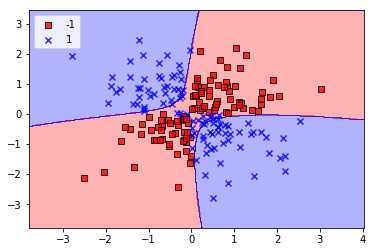

In [9]:
svm = SVC(kernel='rbf', random_state=1, gamma=0.1, C=10.0)
svm.fit(X_xor, y_xor)
plot_decision_regions(X_xor, y_xor, classifier=svm)
plt.legend(loc='upper left')
plt.show()

The parameter $\gamma$, which we set to gamma=0.1, can be understood as a cut-off parameter for the Gaussian sphere. If we increase the value for $\gamma$, we increase the influence or reach of the training samples, which leads to a tighter and bumpier decision boundary. To get a better intuition for $\gamma$, let us apply an RBF kernel SVM to our Iris flower dataset:

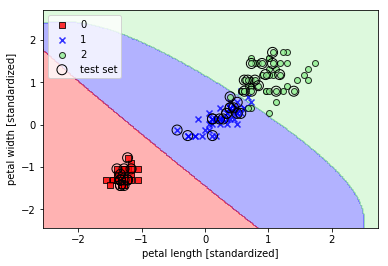

In [14]:
svm = SVC(kernel='rbf', random_state=1, gamma=0.2, C=1.0)
svm.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, y_combined, classifier=svm, test_idx=range(105, 150))

plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()

Let us increase the value of $\gamma$ and observe the effect on the decision boundary:

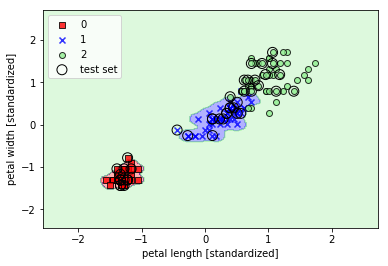

In [15]:
svm = SVC(kernel='rbf', random_state=1, gamma=100.0, C=1.0)
svm.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, y_combined, classifier=svm, test_idx=range(105, 150))

plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()